In [1]:
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(1111111)

M = 10**5                                   # number of draws

### Generating draws for random variable

Generates random numbers, which follow the given PDF.

In [2]:
def myRandom():
    t = max(np.random.random(), np.random.random())
    if np.random.random() > 0.5:
        t = -t
    return t

### Histogram plot

Using the above random generator, array of M random values is generated, using which the histogram frequency plot is drawn.

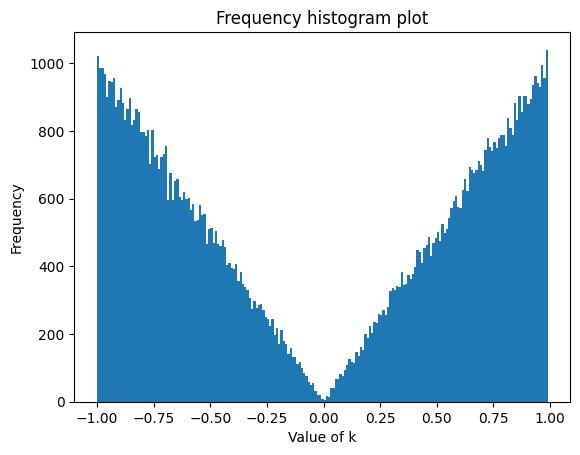

In [3]:
randomDraws = np.array([myRandom() for i in range(M)])

name = "Frequency histogram plot"
plt.hist(randomDraws, bins=np.arange(-1, 1, 0.01))
plt.xlabel("Value of k")
plt.ylabel("Frequency")
plt.title(name)
plt.savefig(f'../results/q4/{name}.svg')
plt.show()

### CDF Plot

Using the above dataset, we filter the points using a varying filter (`i` in the below for-loop), and divide by the total size of the dataset to obtain CDF for the probability of each point in the given dataset.

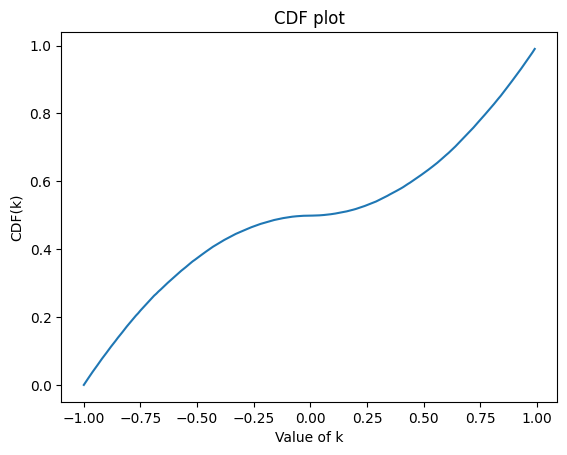

In [4]:
x_axis = np.arange(-1, 1, 0.01)
y_axis = []
name = "CDF plot"

for i in x_axis:
    y_axis.append(len(randomDraws[randomDraws <= i]) / len(randomDraws))                # filtering points using a varying filter

plt.plot(x_axis, y_axis)
plt.xlabel("Value of k")
plt.ylabel("CDF(k)")
plt.title(name)
plt.savefig(f'../results/q4/{name}.svg')
plt.show()

---

### Generating $P_{Y_N}$

$$Y_N := \sum_i{X_i / N}$$ 

In [5]:
def generate_Py(N):
    yn = 0
    for i in range(N):
        yn += myRandom()
    return yn/N

### Plotting frequency histogram for each N

$10^4$ random draws are generated for each N, and the corresponding frequency histograms are plotted.

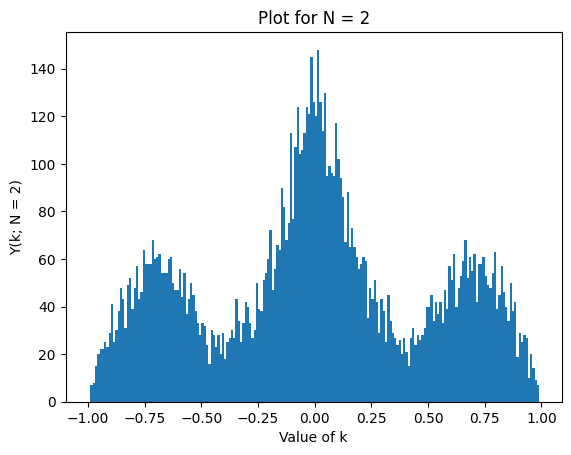

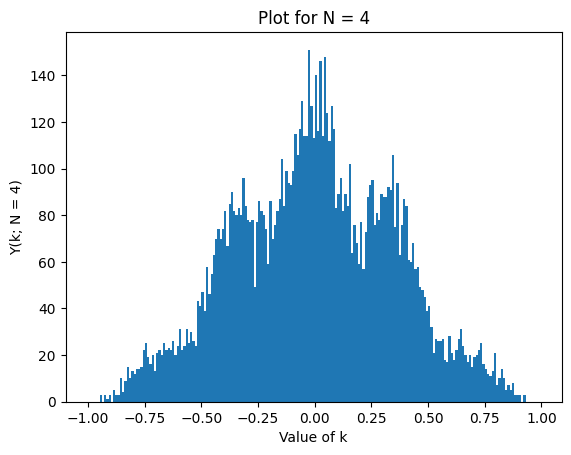

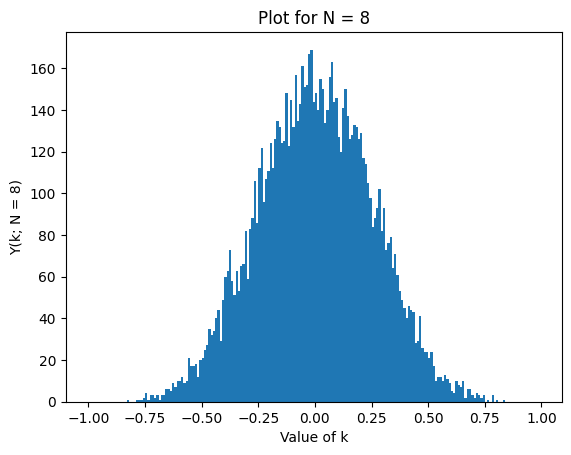

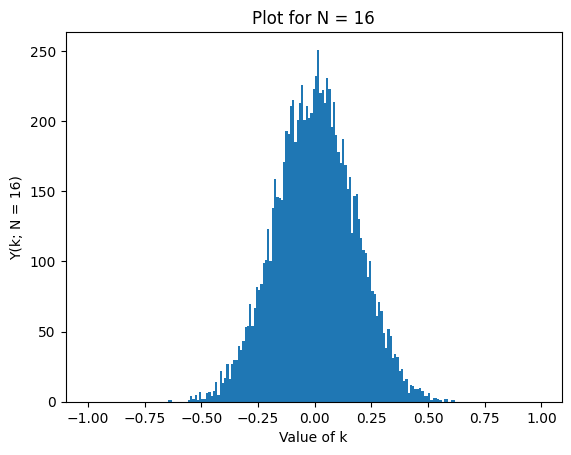

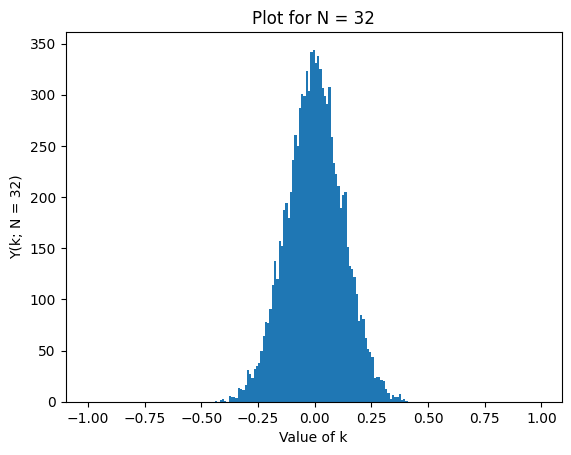

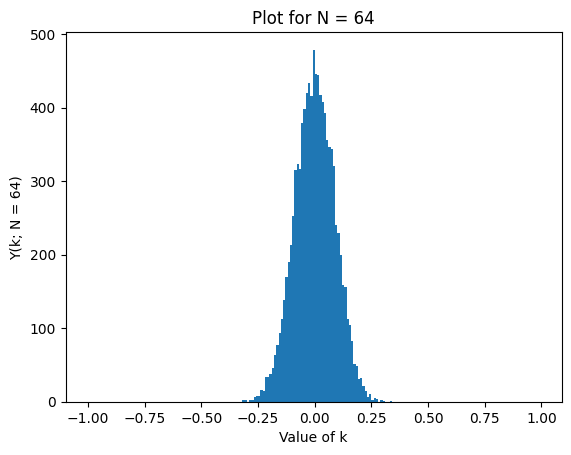

In [6]:
iters = 10**4
N1_array = [2,4,8,16,32,64]

for i in N1_array:
    name = f"Plot for N = {i}"
    y = [generate_Py(i) for j in range(iters)]                          # Array of random draws
    plt.hist(y, bins = np.arange(-1,1,0.01), label=f"N: {i}")
    plt.xlabel("Value of k")
    plt.ylabel(f"Y(k; N = {i})")
    plt.title(name)
    plt.savefig(f'../results/q4/{name}.svg')
    plt.show()

### Plotting CDFs for individual values of N

Using the above dataset, we filter the points using a varying filter (`i` in the below for-loop), and divide by the total size of the dataset to obtain CDF for the probability of each point in the given dataset.

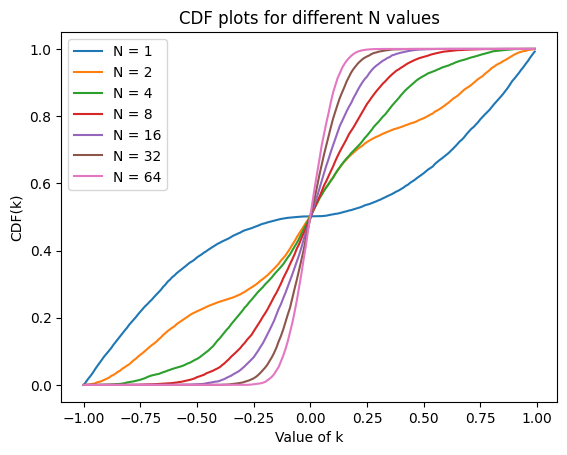

In [7]:
N2_array = [1,2,4,8,16,32,64]
name = 'CDF plots for different N values'

for i in N2_array:
    temp = np.array([generate_Py(i) for j in range(iters)])
    y_axis = []
    
    for j in x_axis:
        y_axis.append(len(temp[temp <= j]) / len(temp))                         # filtering points using a varying filter

    plt.plot(x_axis, y_axis, label=f"N = {i}")

plt.legend()
plt.xlabel("Value of k")
plt.ylabel("CDF(k)")
plt.title(name)
plt.savefig(f'../results/q4/{name}.svg')
plt.show()